# Install required packages

In [3]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install yellowbrick
!pip install lightgbm

# Import required packages

In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

import seaborn as sns
from scipy.stats import pearsonr

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
import pickle

#  Reading CSV file 

In [27]:
df = pd.read_csv('./cardekho_dataset.csv')

In [28]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [30]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


# Exploratory Data Analysis

### Frequency of Top-15 Car Brands

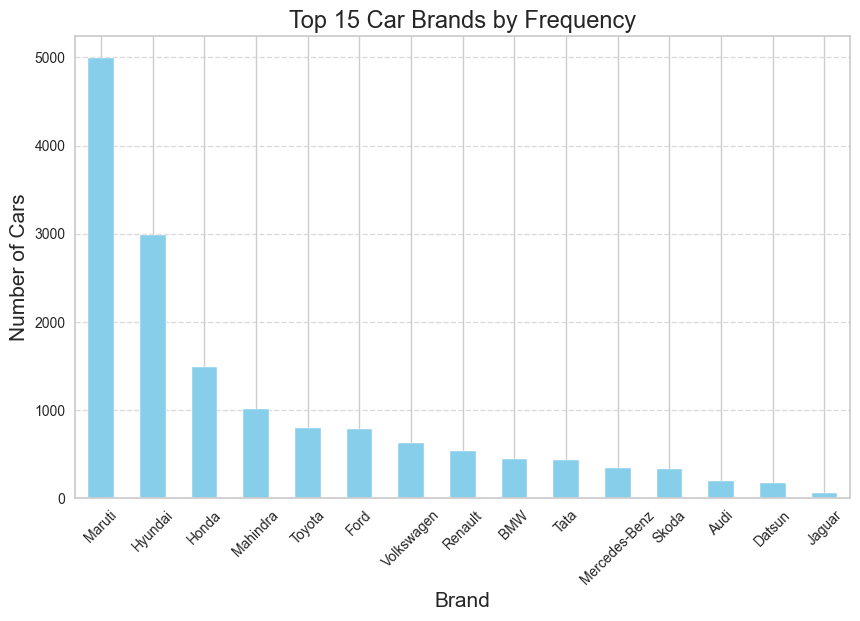

In [31]:
brand_counts = df['brand'].value_counts().head(15)

plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Top 15 Car Brands by Frequency', fontsize=17)
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Number of Cars', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Inferences from Top 15 Car Brands by Frequency

1. **Maruti Dominance**:
   - Maruti is the most frequent car brand, with approximately 5000 cars in the dataset.
   - Significantly higher frequency compared to other brands.

2. **Top Three Brands**:
   - Maruti, Hyundai, and Honda are the top three brands, with Maruti having the highest count, followed by Hyundai and Honda.
   - Hyundai has around 3000 cars, while Honda has around 1500 cars.

3. **Mid-Range Brands**:
   - Mahindra, Toyota, and Ford have a moderate presence, with each brand having around 1000 to 1500 cars.
   - These brands show a noticeable but lower frequency compared to the top three.

4. **Lower Frequency Brands**:
   - Volkswagen, Renault, BMW, Tata, and Mercedes-Benz have frequencies ranging from around 500 to 1000 cars.
   - These brands have a smaller presence in the dataset.

5. **Least Frequent Brands**:
   - Skoda, Audi, Datsun, and Jaguar have the lowest frequencies among the top 15 brands, each with fewer than 500 cars.
   - Jaguar has the smallest presence among the top 15 brands.

6. **Overall Distribution**:
   - There is a steep drop-off in frequency after the top few brands.
   - The distribution indicates a strong market presence for a few brands, with the majority having relatively lower frequencies.

7. **Market Insights**:
   - Maruti's dominance suggests it might be a preferred brand among consumers.
   - The variation in frequencies among brands can provide insights into market preferences and brand popularity.

8. **Potential Market Analysis**:
   - The data could be used to analyze market trends, consumer preferences, and brand loyalty.
   - Brands with lower frequencies might be niche or luxury brands targeting a specific market segment.


### Distribution of Car Mileage by Car Brands

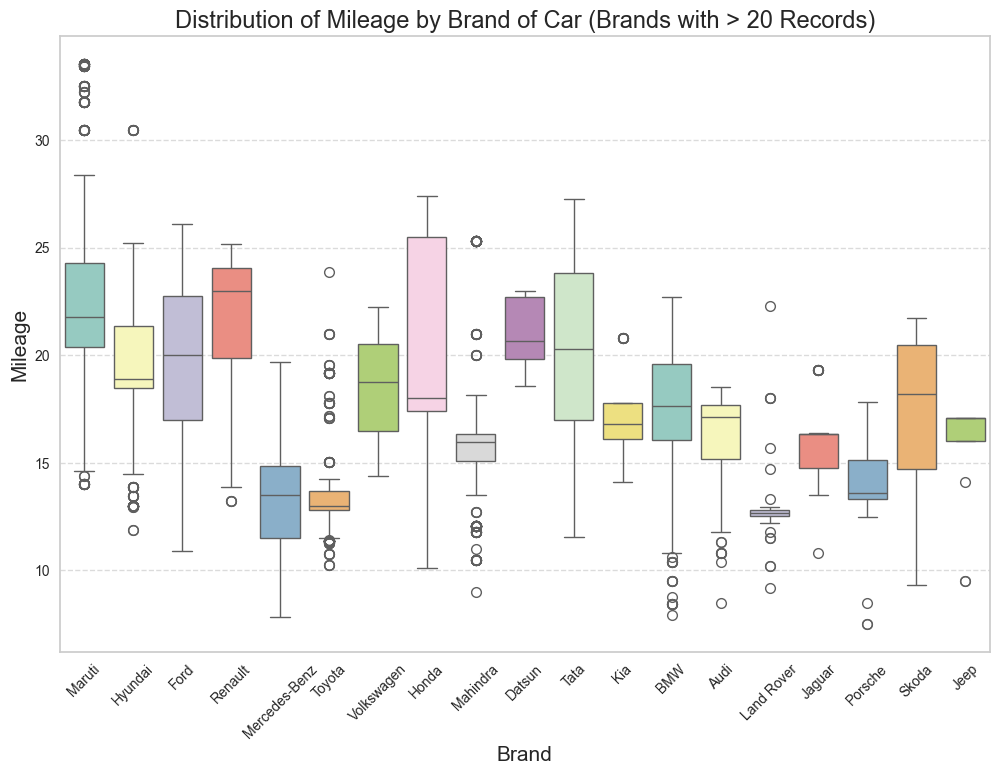

In [32]:
brand_counts = df['brand'].value_counts()
brands_with_more_than_15_records = brand_counts[brand_counts > 20].index
filtered_df = df[df['brand'].isin(brands_with_more_than_15_records)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='mileage', hue='brand', data=filtered_df, palette='Set3', dodge=False, legend=False)
plt.title('Distribution of Mileage by Brand of Car (Brands with > 20 Records)', fontsize=17)
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Mileage', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 1000 KM Driven vs Selling Price

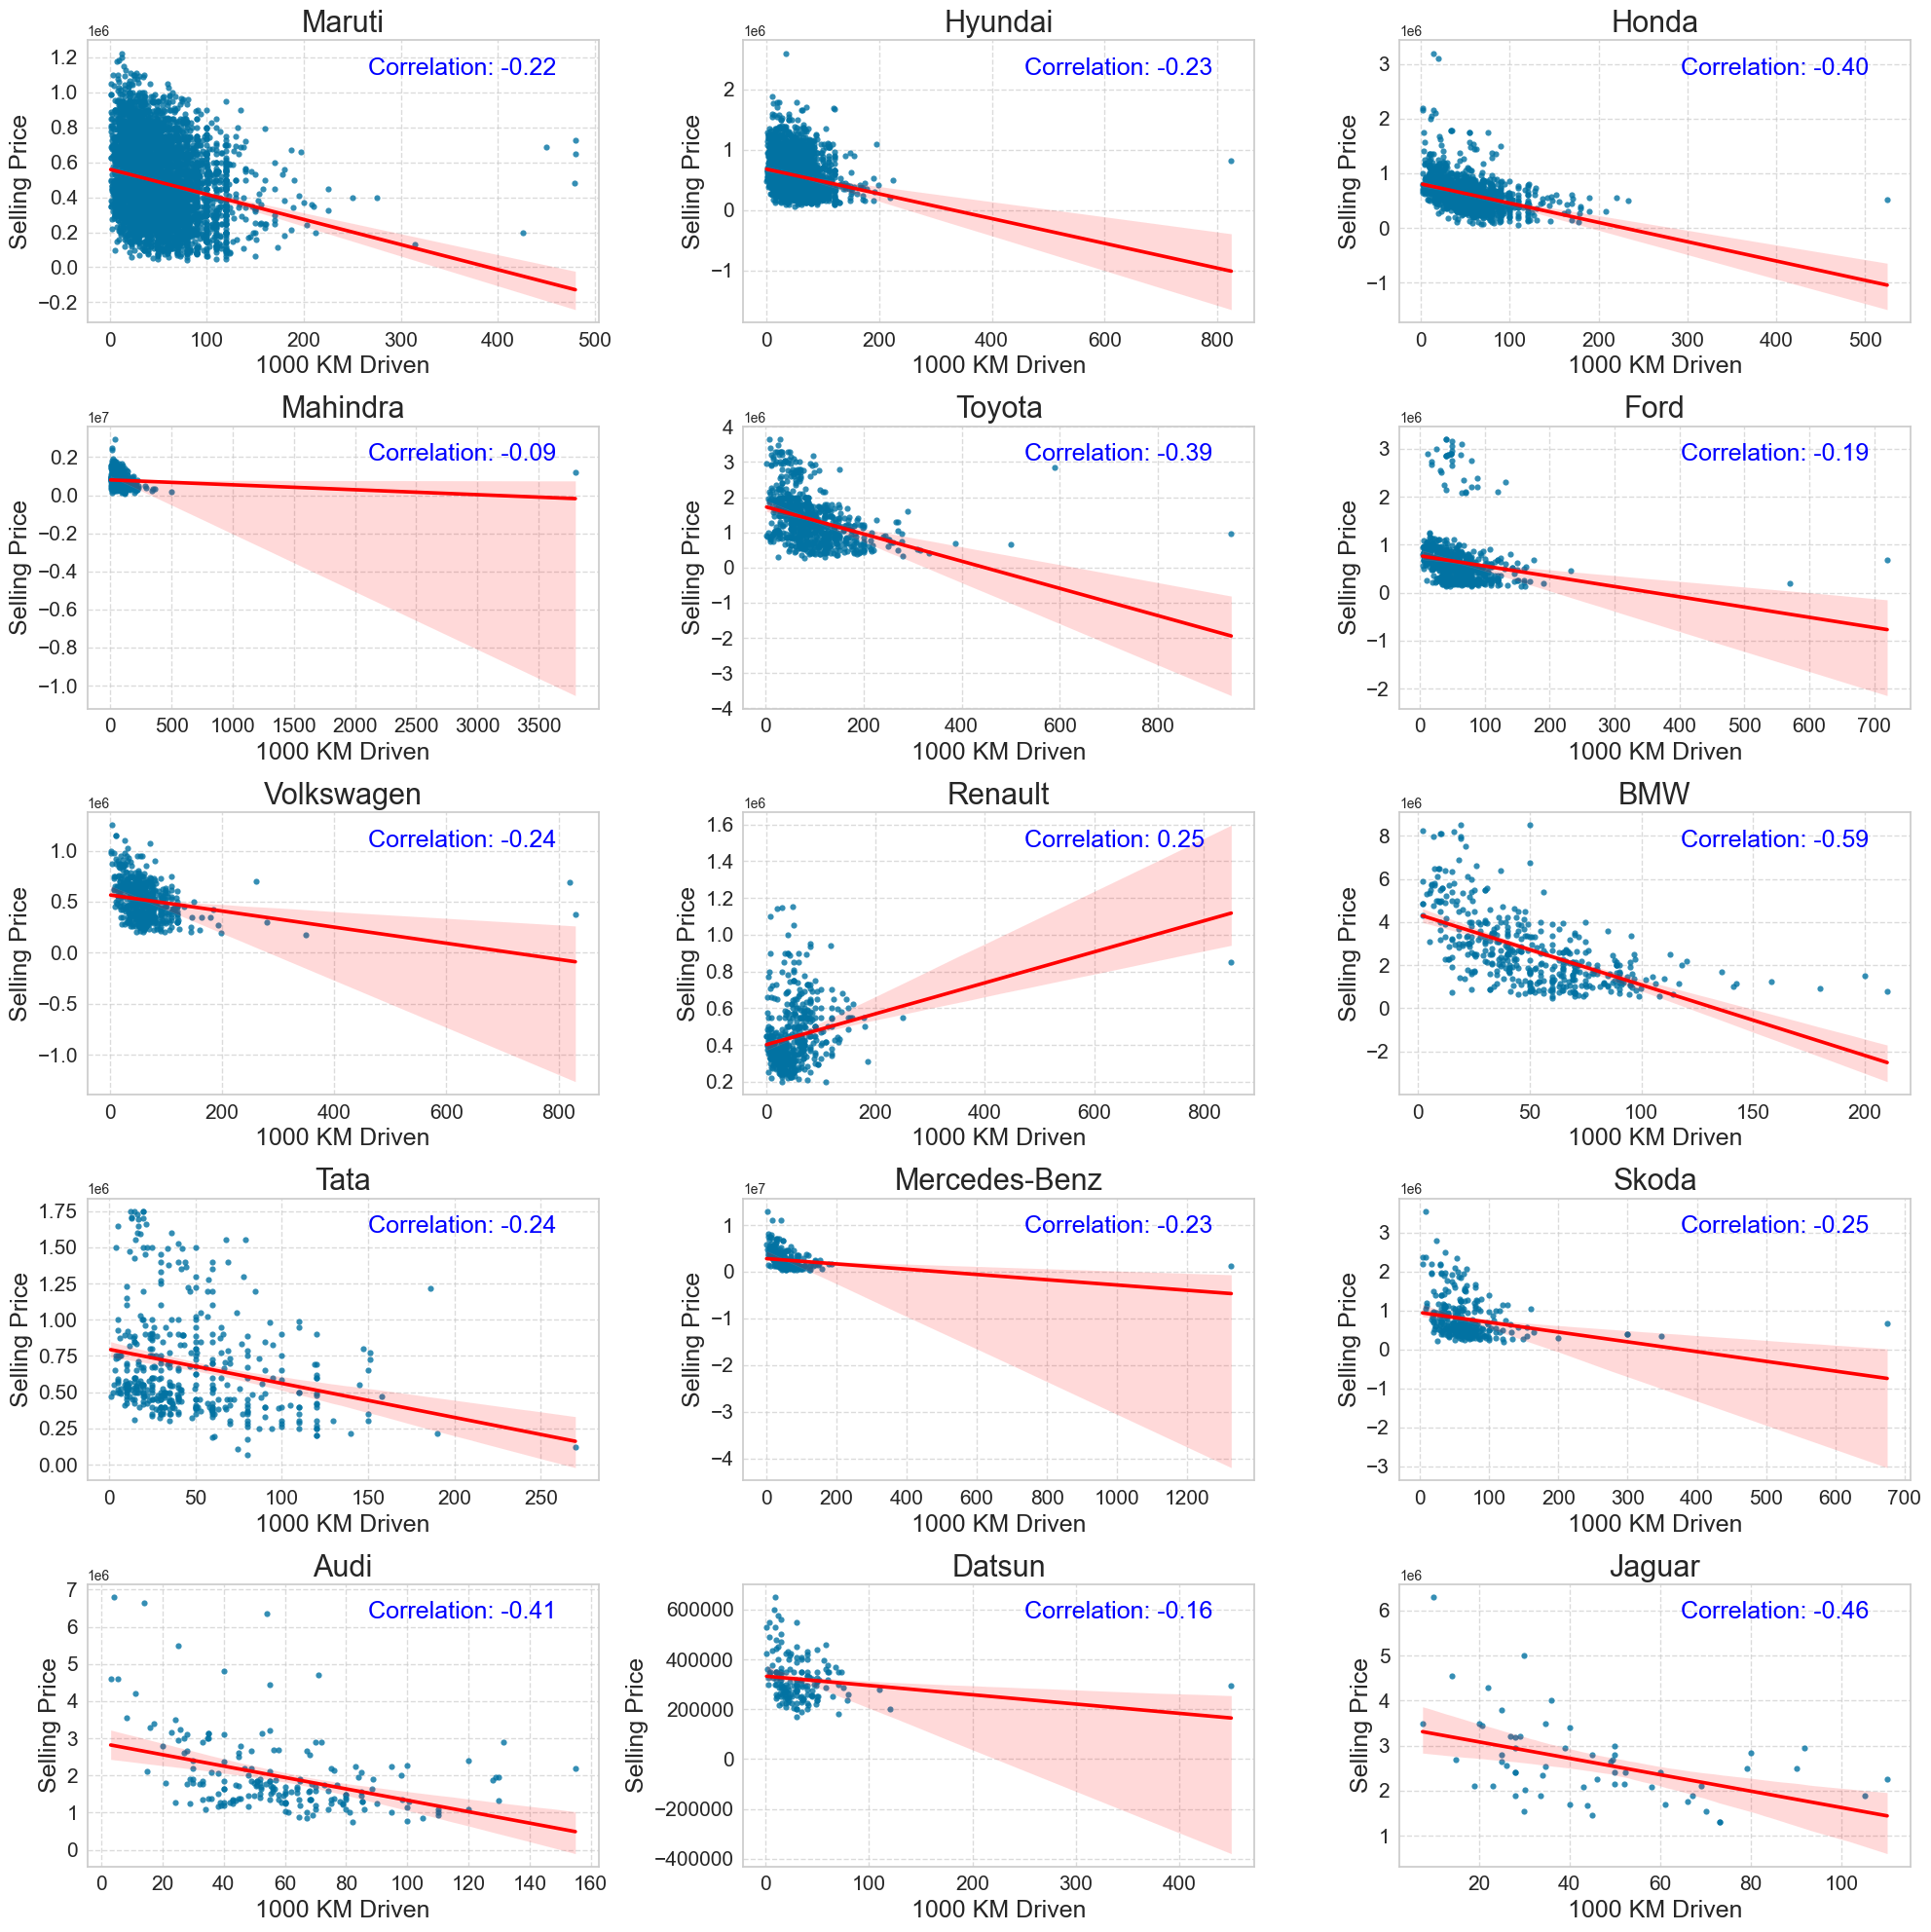

In [33]:
brand_counts = df['brand'].value_counts()
top_15_brands = brand_counts.head(15).index
filtered_df = df[df['brand'].isin(top_15_brands)]

plt.figure(figsize=(20, 20))
for i, brand in enumerate(top_15_brands, 1):
    plt.subplot(5, 3, i)
    brand_data = filtered_df[filtered_df['brand'] == brand].copy()
    brand_data.loc[:, '1000_km_driven'] = brand_data['km_driven'] / 1000
    
    corr, _ = pearsonr(brand_data['1000_km_driven'], brand_data['selling_price'])
    
    sns.regplot(x='1000_km_driven', y='selling_price', data=brand_data, scatter_kws={'s': 20}, line_kws={'color': 'red'})
    plt.title(f'{brand}', fontsize=22)
    plt.xlabel('1000 KM Driven', fontsize=18)
    plt.ylabel('Selling Price', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    
    plt.text(0.55, 0.90, f'Correlation: {corr:.2f}', ha='left', va='center',
             transform=plt.gca().transAxes, fontsize=18, color='blue')

plt.tight_layout()
plt.show()

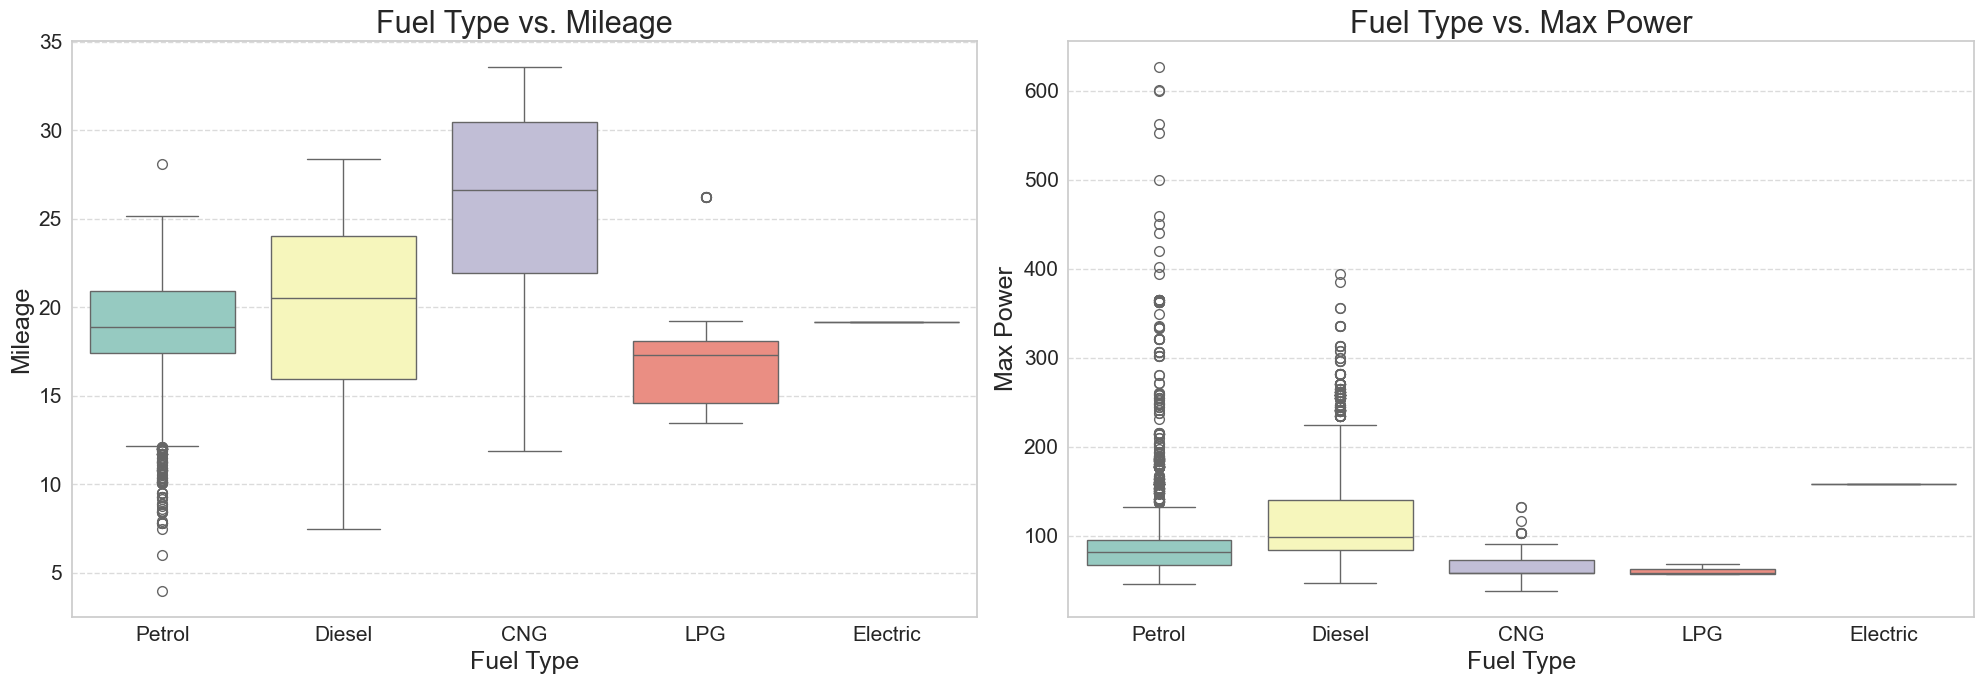

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(ax=axes[0], x='fuel_type', y='mileage', hue='fuel_type', data=df, palette='Set3', dodge=False, legend=False)
axes[0].set_title('Fuel Type vs. Mileage', fontsize=22)
axes[0].set_xlabel('Fuel Type', fontsize=18)
axes[0].set_ylabel('Mileage', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(ax=axes[1], x='fuel_type', y='max_power', hue='fuel_type', data=df, palette='Set3', dodge=False, legend=False)
axes[1].set_title('Fuel Type vs. Max Power', fontsize=22)
axes[1].set_xlabel('Fuel Type', fontsize=18)
axes[1].set_ylabel('Max Power', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

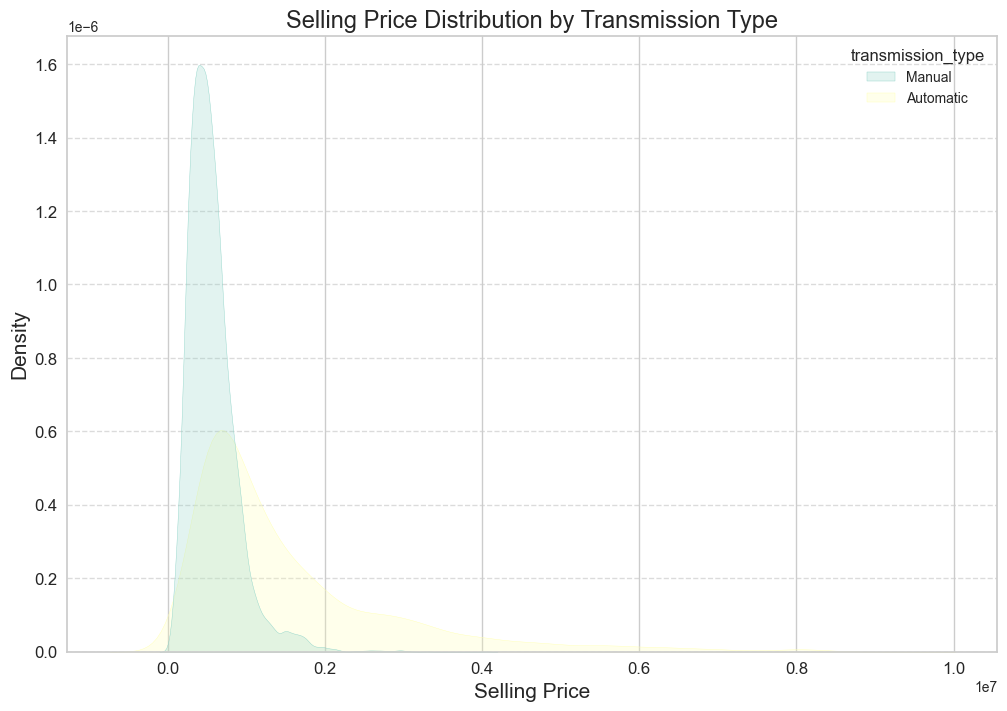

In [35]:
df_capped = df[df['selling_price'] <= 1e7]
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_capped, x='selling_price', hue='transmission_type', fill=True, common_norm=False, palette='Set3')
plt.title('Selling Price Distribution by Transmission Type', fontsize=17)
plt.xlabel('Selling Price', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Inferences from Selling Price Distribution by Transmission Type

1. **Peak Density**:
   - Highest density for both manual and automatic transmission types occurs at lower selling prices.

2. **Manual vs. Automatic**:
   - Manual transmission cars have a higher peak density at lower prices compared to automatic transmission cars.

3. **Spread of Distribution**:
   - Manual transmission cars have a narrower distribution, indicating prices are tightly clustered around the lower range.
   - Automatic transmission cars have a wider distribution, suggesting higher prices are more spread out.

4. **Selling Price Range**:
   - Manual transmission cars show higher density at very low prices, which drops quickly as price increases.
   - Automatic transmission cars maintain noticeable density at higher price ranges.

5. **Market Trends**:
   - Larger proportion of lower-priced manual transmission cars in the market.
   - Higher selling prices are more common among automatic transmission cars.

6. **Implications for Buyers**:
   - Buyers looking for lower-priced vehicles are more likely to find manual transmission cars.
   - Buyers willing to spend more may find more options among automatic transmission cars.


In [36]:
label_encoder = LabelEncoder()

categorical_columns = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [37]:
df.nunique()

car_name              121
brand                  32
model                 120
vehicle_age            24
km_driven            3688
seller_type             3
fuel_type               5
transmission_type       2
mileage               411
engine                110
max_power             342
seats                   8
selling_price        1086
dtype: int64

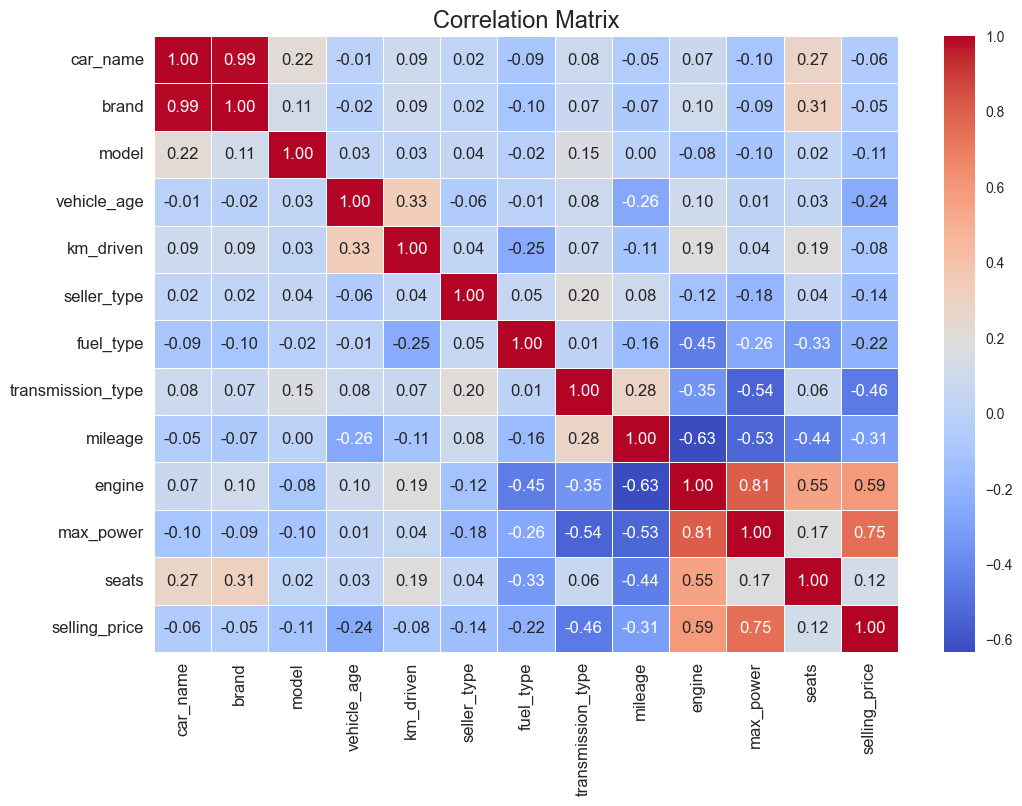

In [38]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Correlation Matrix Inferences

1. **Car Name and Brand**:
   - Very high correlation (0.99) between `car_name` and `brand`.
   - Indicates brand is a major determinant of the car name.

2. **Engine and Max Power**:
   - Strong positive correlation (0.81) between `engine` size and `max_power`.
   - Larger engines tend to have higher maximum power.

3. **Engine and Selling Price**:
   - Significant positive correlation (0.59) between `engine` size and `selling_price`.
   - Larger engines are associated with higher selling prices.

4. **Max Power and Selling Price**:
   - Strong positive correlation (0.75) between `max_power` and `selling_price`.
   - Cars with higher maximum power tend to be more expensive.

5. **Transmission Type and Selling Price**:
   - Moderate negative correlation (-0.46) between `transmission_type` and `selling_price`.
   - Indicates pricing differences based on transmission type.

6. **Mileage and Engine/Max Power**:
   - Negative correlation with `engine` (-0.63) and `max_power` (-0.53).
   - Higher mileage cars tend to have smaller engines and lower maximum power.

7. **Vehicle Age and Selling Price**:
   - Moderate negative correlation (-0.24) between `vehicle_age` and `selling_price`.
   - Older vehicles tend to have lower selling prices.

8. **KM Driven and Vehicle Age**:
   - Moderate positive correlation (0.33) between `km_driven` and `vehicle_age`.
   - Older cars tend to have higher mileage.

9. **Fuel Type and Mileage**:
   - Negative correlation (-0.45) between `fuel_type` and `mileage`.
   - Suggests different mileage performances for petrol and diesel cars.

10. **Transmission Type and Engine**:
    - Moderate negative correlation (-0.35) between `transmission_type` and `engine`.
    - Indicates differences in engine sizes based on transmission type.


In [49]:
modeling_data = df.drop(['car_name', 'model'], axis=1)

In [50]:
X = modeling_data.drop('selling_price', axis=1)
y = modeling_data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
X_train

array([[ 1.97428679,  0.32396921,  0.34910015, ...,  1.75676473,
         2.68168531, -0.40382371],
       [ 1.60021076, -1.33779844, -1.06939362, ..., -0.54708088,
        -0.38274436, -0.40382371],
       [ 0.72736669, -1.33779844, -1.16356435, ...,  0.89354198,
         3.2969105 , -0.40382371],
       ...,
       [ 0.35329066,  0.32396921, -0.83396678, ..., -0.93265371,
        -0.77948273, -0.40382371],
       [-0.89362944, -1.33779844, -0.9516802 , ..., -0.55091742,
        -0.4328045 , -0.40382371],
       [ 0.35329066, -1.33779844, -0.59853995, ..., -0.04257514,
         0.06756306, -0.40382371]])

In [60]:
X

,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,18,9,120000,1,4,1,19.70,796,46.30,5
1,8,5,20000,1,4,1,18.90,1197,82.00,5
2,8,11,60000,1,4,1,17.00,1197,80.00,5
3,18,9,37000,1,4,1,20.92,998,67.10,5
4,6,6,30000,0,1,1,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...
15406,8,9,10723,0,4,1,19.81,1086,68.05,5
15407,18,2,18000,0,4,1,17.50,1373,91.10,7
15408,27,6,67000,0,1,1,21.14,1498,103.52,5
15409,17,5,3800000,0,1,1,16.00,2179,140.00,7


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 12328, number of used features: 10
[LightGBM] [Info] Start training from score 772120.619727


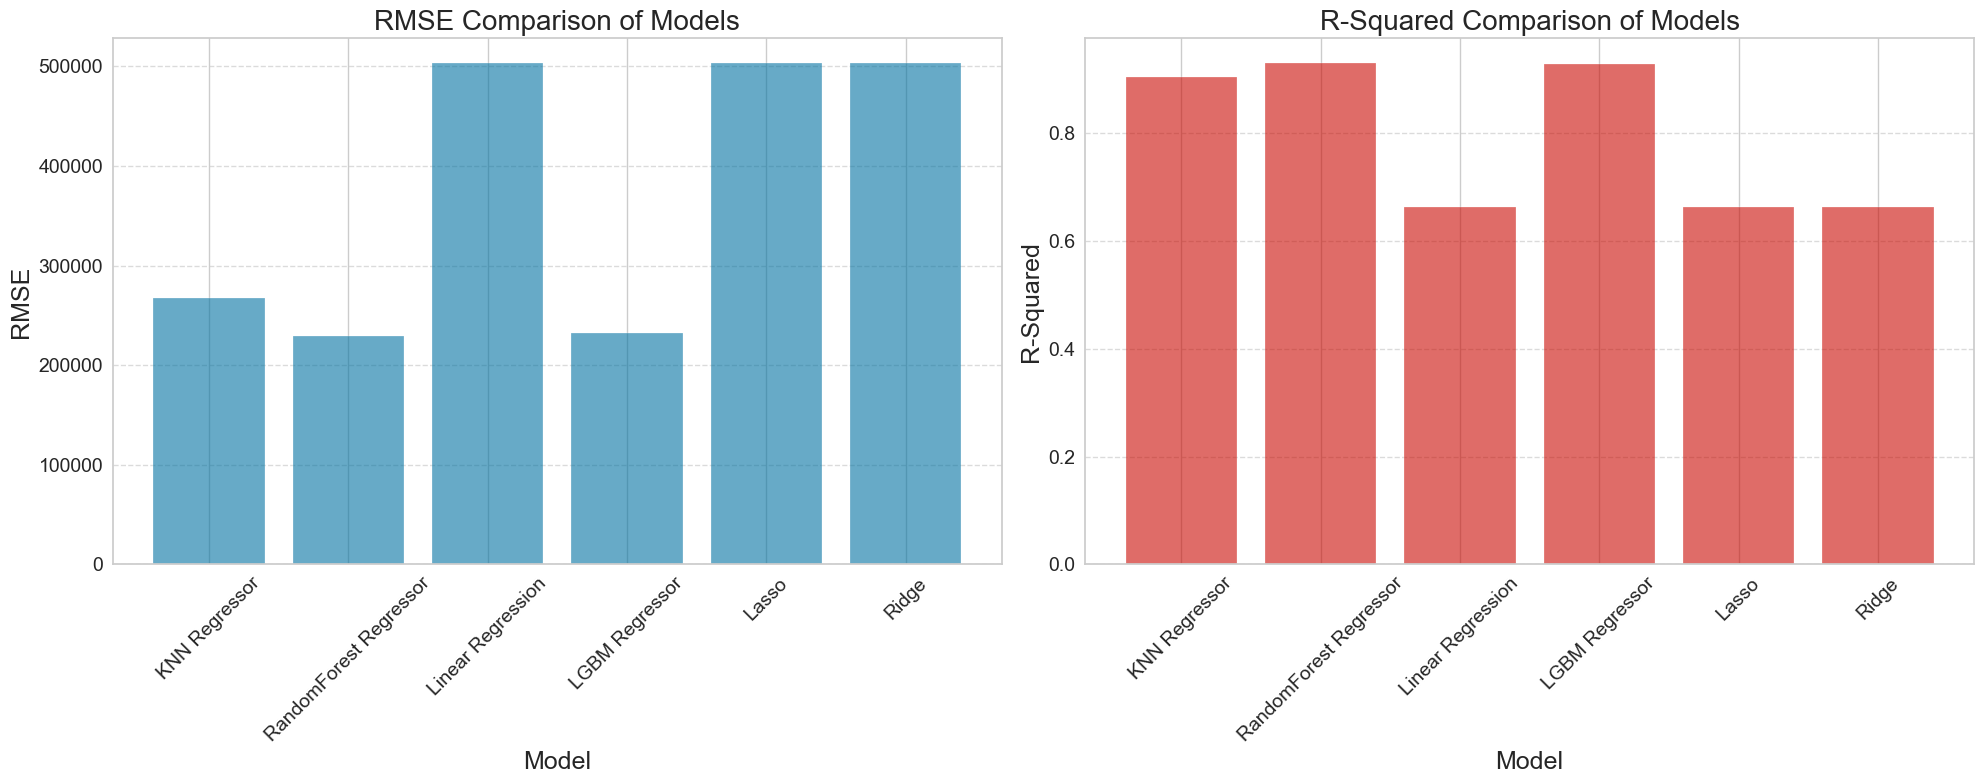

In [43]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2, y_pred

# List of models
models = {
    "KNN Regressor": KNeighborsRegressor(),
    "RandomForest Regressor": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "LGBM Regressor": LGBMRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}

# Dictionary to store evaluation metrics
model_performance = {
    "Model": [],
    "RMSE": [],
    "R-Squared": [],
    "Predictions": []
}

# Training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    rmse, r2, y_pred = evaluate_model(model, X_test, y_test)
    model_performance["Model"].append(model_name)
    model_performance["RMSE"].append(rmse)
    model_performance["R-Squared"].append(r2)
    model_performance["Predictions"].append(y_pred)





# Creating a DataFrame for performance metrics
performance_df = pd.DataFrame(model_performance)


# Identifying the best model based on RMSE
best_model_name = performance_df.loc[performance_df["RMSE"].idxmin(), "Model"]
best_model = models[best_model_name]


# Saving the best model to a pickle file
with open(f'best_model_{best_model_name}.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Plotting RMSE and R-Squared comparison side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Bar plot for RMSE
axs[0].bar(performance_df["Model"], performance_df["RMSE"], color='b', alpha=0.6)
axs[0].set_xlabel('Model', fontsize=18)
axs[0].set_ylabel('RMSE', fontsize=18)
axs[0].set_title('RMSE Comparison of Models', fontsize=20)
axs[0].tick_params(axis='x', rotation=45, labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar plot for R-Squared
axs[1].bar(performance_df["Model"], performance_df["R-Squared"], color='r', alpha=0.6)
axs[1].set_xlabel('Model', fontsize=18)
axs[1].set_ylabel('R-Squared', fontsize=18)
axs[1].set_title('R-Squared Comparison of Models', fontsize=20)
axs[1].tick_params(axis='x', rotation=45, labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

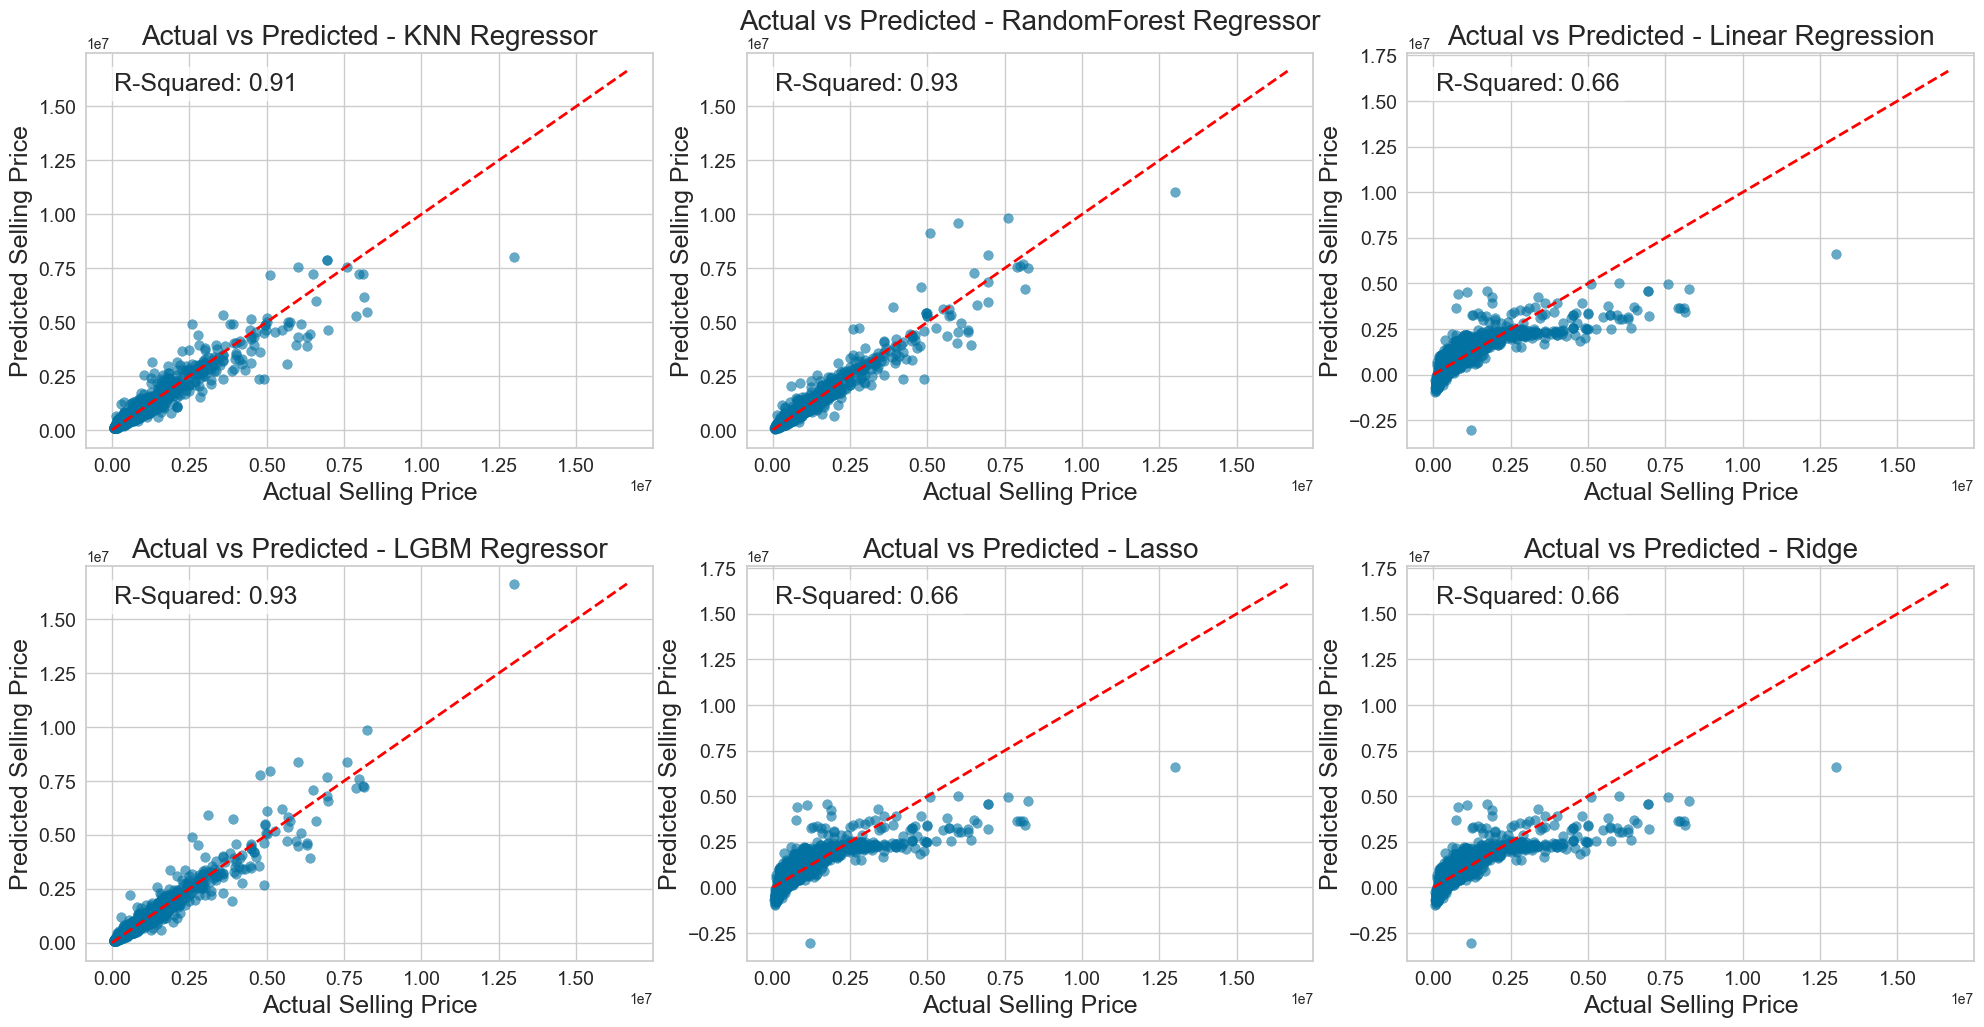

In [44]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

axs = axs.flatten()

max_price = max(y_test.max(), *[max(pred) for pred in performance_df["Predictions"]])

for i, model_name in enumerate(models.keys()):
    axs[i].scatter(y_test, performance_df["Predictions"][i], alpha=0.6)
    axs[i].plot([0, max_price], [0, max_price], color='red', linestyle='--', linewidth=2)
    r2 = performance_df["R-Squared"][i]
    axs[i].set_title(f'Actual vs Predicted - {model_name}', fontsize=20)
    axs[i].set_xlabel('Actual Selling Price', fontsize=18)
    axs[i].set_ylabel('Predicted Selling Price', fontsize=18)
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    axs[i].grid(True)
    axs[i].text(0.05, 0.95, f'R-Squared: {r2:.2f}', transform=axs[i].transAxes, fontsize=18, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

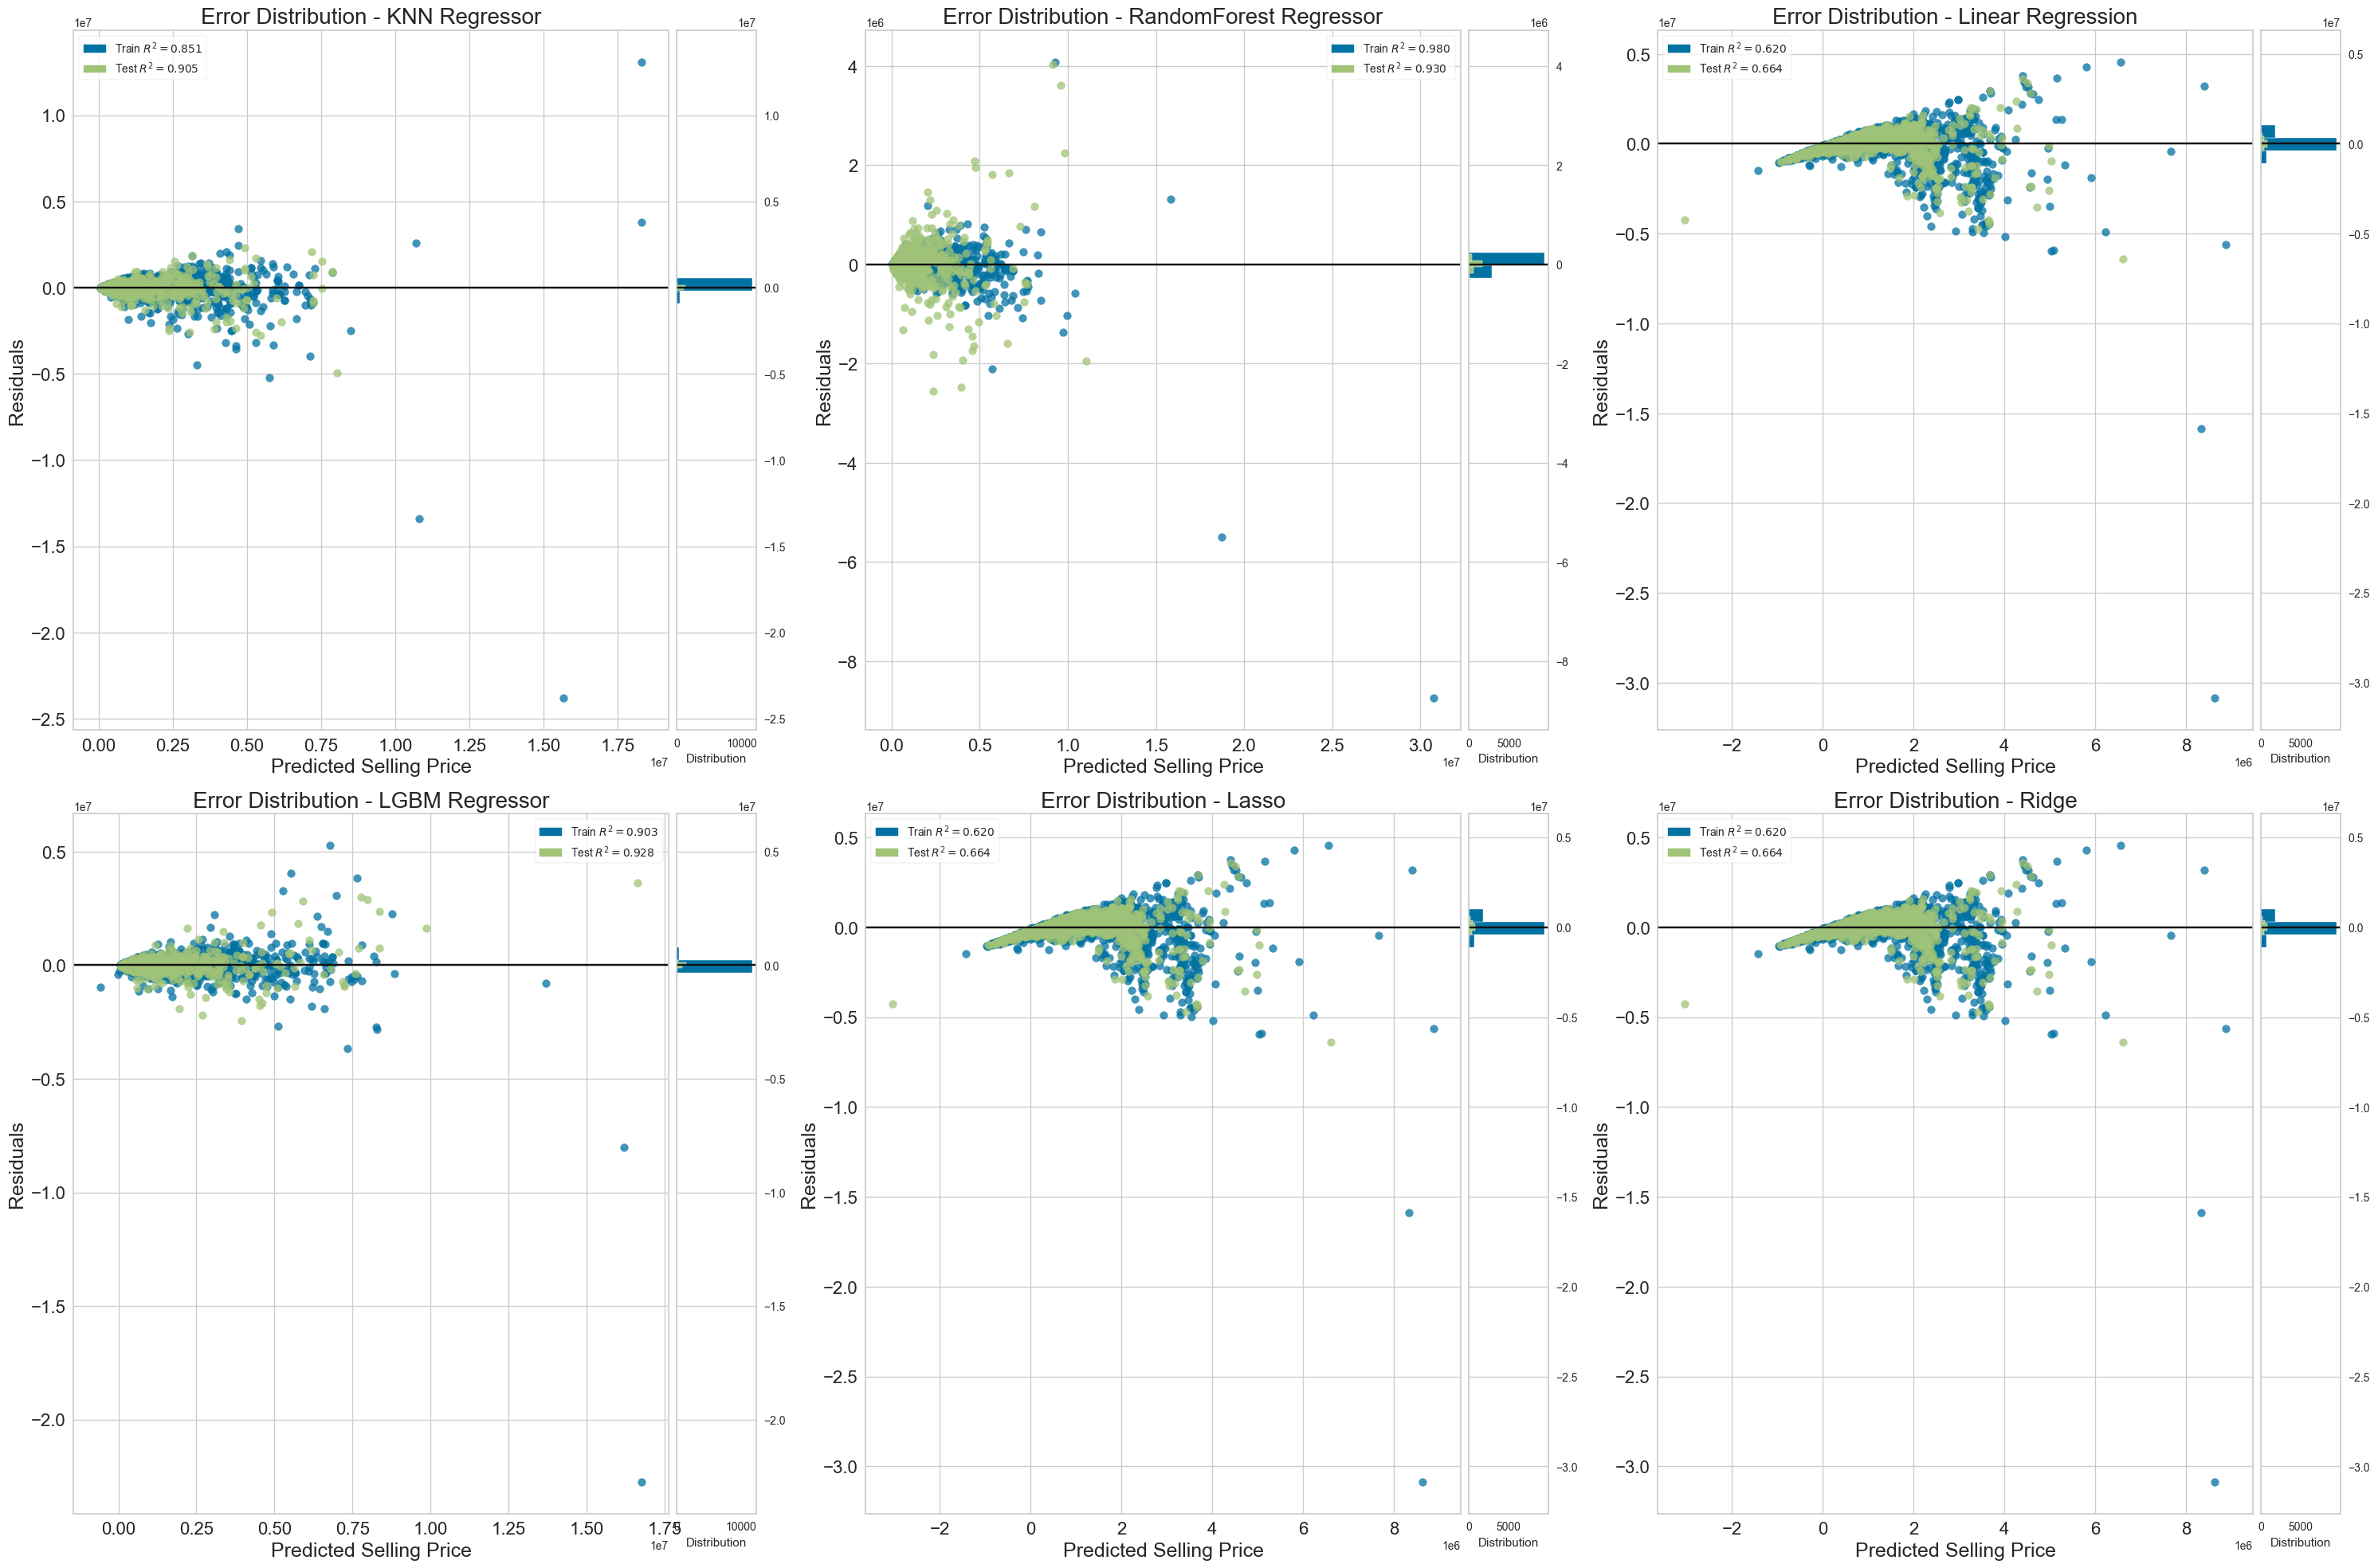

In [45]:
from yellowbrick.regressor import ResidualsPlot

# Plotting Error Distribution for each model in a 3x3 subplot
fig, axs = plt.subplots(2, 3, figsize=(30, 20))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, (model_name, model) in enumerate(models.items()):
    visualizer = ResidualsPlot(model, ax=axs[i])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.finalize()
    axs[i].set_title(f'Error Distribution - {model_name}', fontsize=20)
    axs[i].set_xlabel('Predicted Selling Price', fontsize=18)
    axs[i].set_ylabel('Residuals', fontsize=18)
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()